In [3]:
!ls data/train-jpg/ | head -2

train_0.jpg
train_10000.jpg
ls: write error: Broken pipe


In [202]:
from albumentations import Flip, ChannelShuffle, BasicTransform, Blur, Compose, Normalize, RGBShift, RandomBrightnessContrast, RandomRotate90, RandomScale, RandomSizedCrop, Transpose
from albumentations.pytorch import ToTensor
from pathlib import Path

import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
data_dir = Path('data')
img_path = data_dir/'train-jpg'/'train_10.jpg'
img_path

PosixPath('data/train-jpg/train_10.jpg')

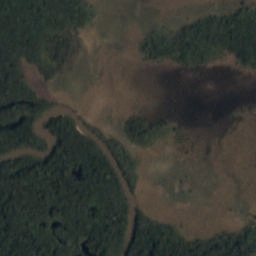

In [196]:
img = Image.open(img_path).convert('RGB')
img

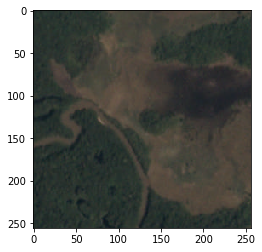

In [200]:
# Note cv2 cannot handle pathlib path directly
img = cv2.imread(str(f'{data_dir}/train-jpg/train_10.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [15]:
img.shape

(256, 256, 3)

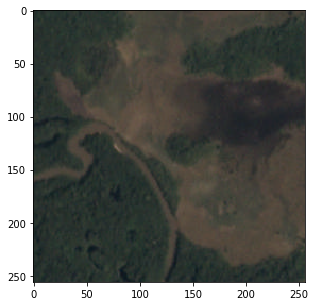

In [26]:
plt.figure(figsize=(5, 5))
plt.imshow(img)

In [110]:
def img_show(aug, img):
    aug_img = aug(image=img)['image']
    plt.figure(figsize=(5, 5))
    plt.imshow(aug_img)

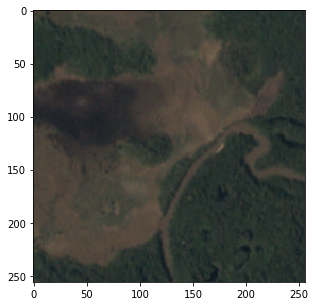

In [41]:
img_show(Flip(p=0.5), img)

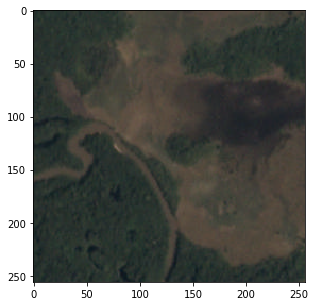

In [55]:
img_show(RandomRotate90(p=0.5), img)

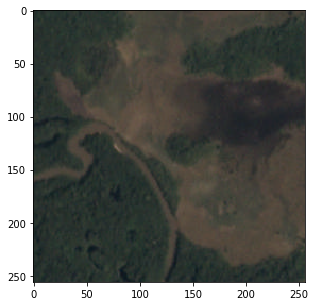

In [70]:
img_show(RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5), img)

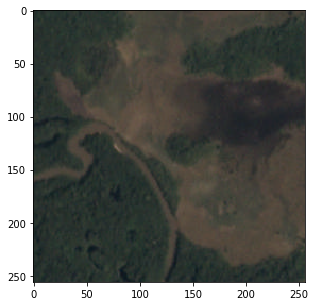

In [82]:
img_show(ChannelShuffle(p=0.5), img)

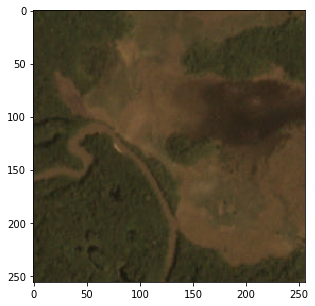

In [87]:
img_show(RGBShift(p=0.5), img)

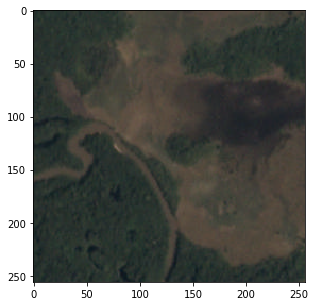

In [92]:
img_show(Transpose(p=0.5), img)

aug


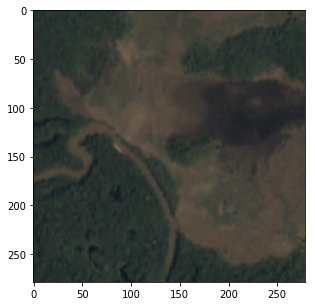

In [122]:
img_show(RandomScale(scale_limit=0.1, p=0.5), img)

In [159]:
from albumentations import CLAHE, ShiftScaleRotate

aug


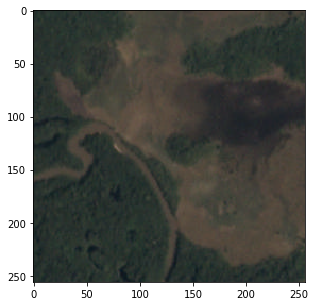

In [144]:
img_show(CLAHE(clip_limit=1.0), img)

aug


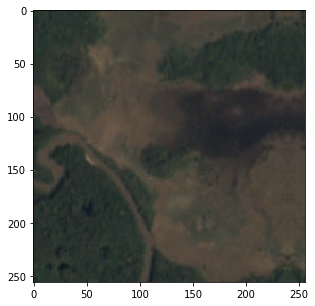

In [167]:
img_show(, img)

In [215]:
space_transform = Compose([
    CLAHE(clip_limit=1.0, p=0.25),
    Flip(p=0.5),
    RandomRotate90(p=0.5),
    RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
    ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0),
    RGBShift(p=0.25),
    Normalize(),
    ToTensor()
])

In [216]:
t = space_transform(image=img)

In [217]:
t['image'].shape

torch.Size([3, 256, 256])